# 분류 및 회귀

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

## k-NN

### 분류 문제  예제

In [1]:
# 라이브러리를 임포트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# 데이터 로드-아이리스
iris=datasets.load_iris()
X=iris.data
y=iris.target

# 표준화 객체 생성 - 특성 파악을 위한 작업
sd=StandardScaler()

# 특성을 표준화 함 - 특성 파악을 위한 작업
X_standardized=sd.fit_transform(X)

# k=5인 최근적 이웃 모델 생성-꽃받침, 꽃잎
knn=KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_standardized, y)

# 시험을 위한 2개의 샘플 생성
observation=[
             [0.75, 0.75, 0.75, 0.75,],
             [1,1,1,1]
]


#  2개의 샘플이 속할 클래스 예측
knn.predict(observation)

array([1, 2])

In [2]:
# 2개의 샘플이 세 클래스에 속할 확률을 조회

knn.predict_proba(observation)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

### 회귀 문제 예제

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 생성 (임의의 회귀 데이터 생성)
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# 훈련 세트와 테스트 세트로 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-최근접 이웃 회귀 모델 생성
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# 모델을 훈련 세트에 맞춤
knn_regressor.fit(X_train, y_train)

# 모델을 사용하여 테스트 세트에 대한 예측 수행
y_pred = knn_regressor.predict(X_test)

# 예측값과 실제값 사이의 평균 제곱 오차(MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.5881038103118676


### 최선의 이웃 개수 결정하기

In [4]:
# 라이브러리를 임포트합니다.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 표준화 객체를 만듭니다.
standardizer = StandardScaler()

# KNN 분류기를 만듭니다.
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# 파이프라인을 만듭니다.
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

# 탐색 영역의 후보를 만듭니다.
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# 그리드 서치를 만듭니다.
classifier = GridSearchCV(
    pipe, search_space, cv=5, verbose=0).fit(features, target)

# 최선의 이웃 개수 (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

### Scikit-learn을 이용한 분류 예제 - Iris Data 분류


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
df = pd.DataFrame(X, columns = iris.feature_names)
print("< Iris Data >")
print("The number of sample data : " + str(len(df)))
print("The number of features of the data : " + str(len(df.columns)))
print("The labels of the data : " + str(np.unique(y)))
df

< Iris Data >
The number of sample data : 150
The number of features of the data : 4
The labels of the data : [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# split whole data set into train set and test set
# test_size : the proportion of the dataset to include in the test split. (0~1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    random_state = 42)

print("The number of train data set : %d " %len(X_train))
print("The number of test data set : %d " %len(X_test))

The number of train data set : 100 
The number of test data set : 50 


In [9]:
# instantiate learning model (k = 3)
estimator = KNeighborsClassifier(n_neighbors=3)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.980000000


In [10]:
# perform 10-fold cross validation

# create odd list of k for kNN
myList = list(range(1,50))
neighbors = [ x for x in myList if x % 2 != 0]
print(neighbors)
print("The number of neighbors k is %d" %len(neighbors))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The number of neighbors k is 25


In [11]:
# empty list that will hold cross validation scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    print("< k = %d >" %k)
    estimator = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator, X_train, y_train, cv = 10, scoring = 'accuracy')
    print("The scores of classification are \n" + str(scores))
    cv_scores.append(scores.mean()) # average error
    print("The average score of scores is %.9f \n" %scores.mean())

< k = 1 >
The scores of classification are 
[1.  0.9 1.  0.8 0.8 1.  1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 3 >
The scores of classification are 
[0.9 1.  1.  0.7 0.9 1.  1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 5 >
The scores of classification are 
[1.  1.  1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 7 >
The scores of classification are 
[1.  0.9 1.  0.7 1.  0.9 1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 9 >
The scores of classification are 
[0.9 1.  1.  0.7 1.  0.9 1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 11 >
The scores of classification are 
[1.  0.9 1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The average score of scores is 0.930000000 

< k = 13 >
The scores of classification are 
[0.9 0.9 1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The average score of scores is 0.920000000 

< k = 15 >
The scores of classification are 
[1.  0.9 1.  0.7 0.9 1.  1.  1.  1. 

C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
  File "C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = sel

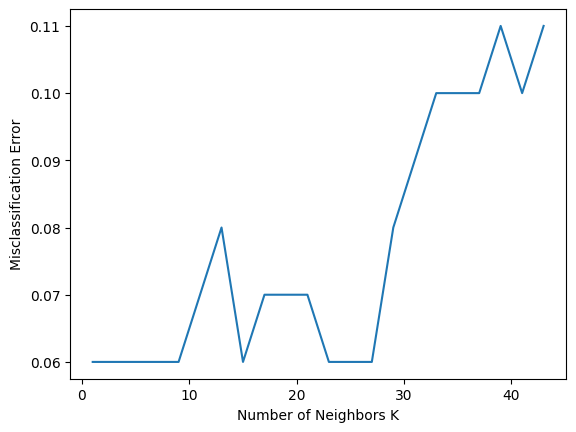

The optimal number of neighbors i is 1


In [12]:
# changing to misclassification rate (a.k.a classification error)
# MSE = 1 - cross validation score
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# determining best k
min_MSE = min(MSE)
index_of_min_MSE = MSE.index(min_MSE)
optimal_k = neighbors[index_of_min_MSE]
print ("The optimal number of neighbors i is %d" % optimal_k)

In [13]:
# instantiate learning model (k = 7)
estimator = KNeighborsClassifier(n_neighbors=3)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.980000000


## scikit-learn 패키지를 사용한 선형 회귀분석

In [14]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

data = {'x1' : [13, 18, 17, 20, 22, 21],
        'x2' : [9, 7, 17, 11, 8, 10],
        'y' : [20, 22, 30, 27, 35, 32]}
data = pd.DataFrame(data)
X = data[['x1', 'x2']]
y = data['y']
data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


In [15]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b balue = ', linear_regression.coef_)

a value =  -7.359201773835938
b balue =  [1.5443459  0.62472284]


In [16]:
residuals = y-prediction
residuals.describe()

count    6.000000e+00
mean     2.368476e-15
std      2.622371e+00
min     -3.399667e+00
25%     -1.987805e+00
50%      5.828714e-01
75%      1.415327e+00
max      3.385809e+00
Name: y, dtype: float64

In [17]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.796944017668523


In [18]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X = pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.796944017668523
Mean_Squared_Error =  5.730691056910575
RMSE =  2.3938861829482567


## 회귀 모델 사례 -붓꽃(Iris)

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
data = datasets.load_iris()
#데이터셋
input_data = data['data'] # 꽃의 특징 (input data)
target_data = data['target'] #꽃 종류를 수치로 나탄내 것 (0 ~ 2) (target data)
flowers = data['target_names'] # 꽃 종류를 이름으로 나타낸 것
feature_names = data['feature_names'] # 꽃 특징들의 명칭
#sepal : 꽃받침
#petal : 꽃잎
print('꽃을 결정짓는 특징 : {}'.format(feature_names))
print('꽃 종류 : {}'.format(flowers))

꽃을 결정짓는 특징 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
꽃 종류 : ['setosa' 'versicolor' 'virginica']


In [25]:
iris_df = pd.DataFrame(input_data, columns=feature_names)
iris_df['species'] = target_data
#맨 위에 있는 데이터 10개 출력
print(iris_df.head(10))
#데이터의 정보 출력
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  


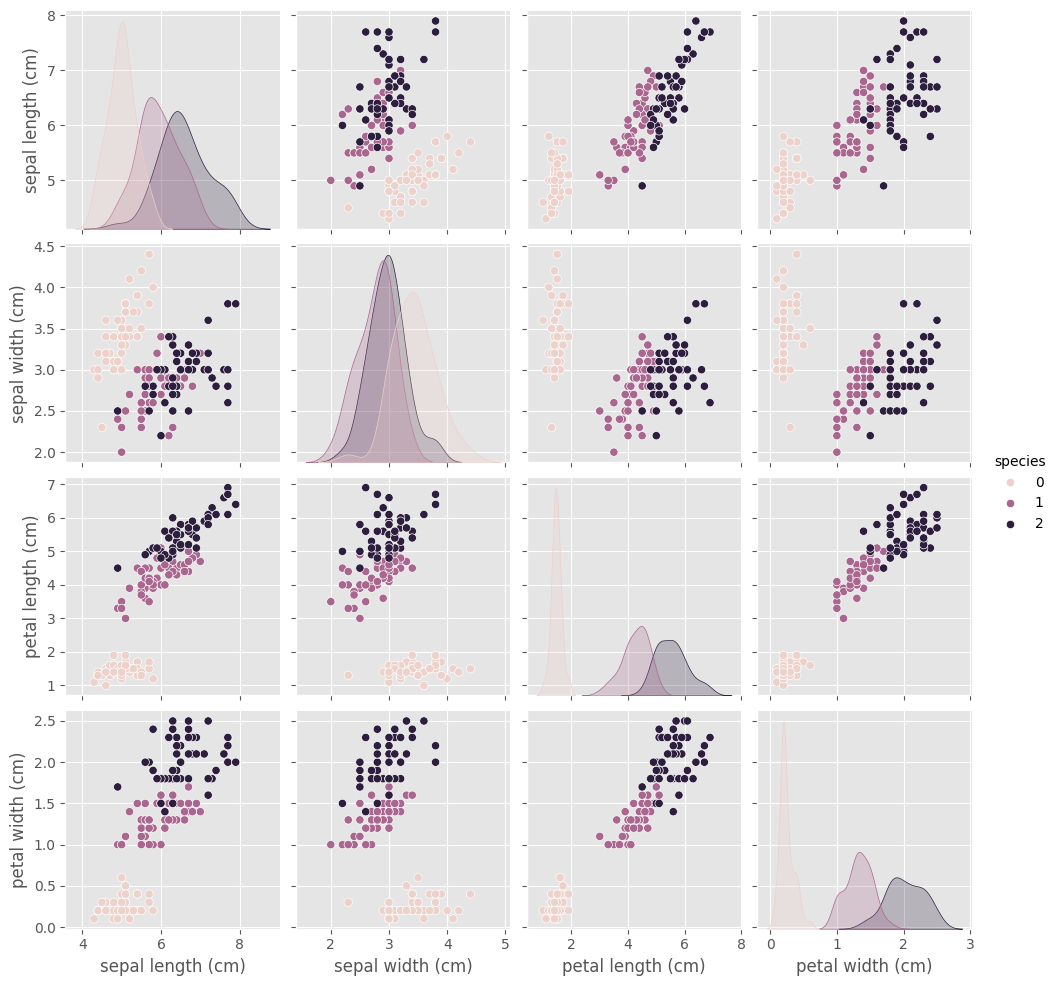

In [26]:
#4가지 변수(특징)의 관계를 'seaborn' 라이브러리에서 제공하는 pairplot() 메소드로 표현한 그래프 16가지

sns.pairplot(iris_df, hue='species', vars=feature_names)
plt.show()

In [27]:
#훈련 데이터와 테스트 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    input_data, target_data, random_state=42)
#표준점수로 데이터 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

In [28]:
lr = LogisticRegression(max_iter=1000)
#로지스틱 회귀 학습
lr.fit(train_scaled, train_target)
#테스트 데이터 예측
pred = lr.predict(test_scaled[:5])
print(pred)

[1 0 2 1 1]


In [30]:
#각 특징들의 가중치(weight)와 절편(bias)을 확인

#로지스틱 회귀 모델의 가중치와 절편
#다중 분류 가중치와 절편을 출력하면, 각 클래스마다의 가중치 절편을 출력한다.
print(lr.coef_, lr.intercept_)

[[-0.97511573  1.08893052 -1.78416098 -1.65224049]
 [ 0.5072161  -0.30353329 -0.3290721  -0.69052199]
 [ 0.46789963 -0.78539723  2.11323308  2.34276248]] [-0.39150253  1.92427457 -1.53277204]


In [31]:
setosa_z1 = (-0.96 * 5.1) + (1.09 * 3.5) + (-1.78 * 1.4) + (-1.66 * 0.2) - 0.39
versicolor_z2 = (0.51 * 5.1) + (-0.30 * 3.5) + (-0.32 * 1.4) + (-0.7 * 0.2) - 1.92
virginica_z3 = (0.47 * 5.1) + (-0.79 * 3.5) + (2.11 * 1.4) + (2.34 * 0.2) - 1.53
print(setosa_z1)
print(versicolor_z2)
print(virginica_z3)

setosa_rs=setosa_z1/(setosa_z1+versicolor_z2+virginica_z3)
versicolor_rs=versicolor_z2/(setosa_z1+versicolor_z2+virginica_z3)
virginica_rs=virginica_z3/(setosa_z1+versicolor_z2+virginica_z3)
print(setosa_rs)
print(versicolor_rs)
print(virginica_rs)

-4.294999999999999
-0.957
1.5239999999999994
1.1520922746781115
0.25670600858369097
-0.40879828326180245


In [33]:
# decision_function()에 테스트 데이터 5개를 넣고 소수점 2자리까지 출력

#결정 함수(decision_function)로 z1 ~ z3의 값을 구한다.
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[-2.21  2.1   0.1 ]
 [ 5.87  2.56 -8.43]
 [-9.33  1.8   7.53]
 [-2.29  1.73  0.56]
 [-3.59  2.33  1.26]]


In [34]:
#z값으로 직접 확률을 구할 필요가 없다. decision_function()을 통해 구한 값을 scipy에서 제공하는 softmax 함수에 전달해주면 각 클래스에 대한 확률을 구해주기 때문이다.

#소프트맥스 함수를 사용한 각 클래스들의 확률
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.012 0.87  0.118]
 [0.965 0.035 0.   ]
 [0.    0.003 0.997]
 [0.013 0.752 0.234]
 [0.002 0.745 0.253]]


In [35]:
import matplotlib as mp

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

features = [2, 3]
X = iris.data[:, features]
y = iris.target

model = SVC(kernel="linear", random_state=0)
model.fit(X, y)

XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                     np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

C:\Users\k8s\AppData\Local\Temp\ipykernel_560\1506582701.py:8: UserWarning: You passed a edgecolor/edgecolors ('darkblue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 2, 0], X[y == 2, 1], s=30, label=iris.target_names[2],
C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\IP

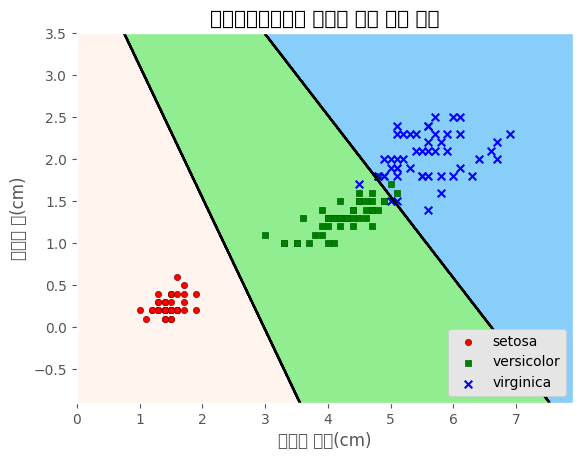

In [36]:
cmap = mp.colors.ListedColormap(['seashell', 'lightgreen', 'lightskyblue'])
plt.contourf(XX, YY, ZZ, cmap=cmap)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=20, label=iris.target_names[0],
            marker="o", edgecolors="darkred", facecolors="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=20, label=iris.target_names[1],
            marker="s", edgecolors="darkgreen", facecolors="green")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=30, label=iris.target_names[2],
            marker="x", edgecolors="darkblue", facecolors="blue")
plt.xlim(XX_min, XX_max)
plt.ylim(YY_min, YY_max)
plt.xlabel("꽃잎의 길이(cm)")
plt.ylabel("꽃잎의 폭(cm)")
plt.title("서포트벡터머신을 이용한 붓꽃 분류 결과")
plt.legend(loc="lower right", framealpha=1)
plt.show()

# Q 당뇨병 진행도 예측
```

scikit-learn 패키지가 제공하는 당뇨병 진행도 예측용 데이터는 442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.
이 데이터의 독립변수를 조사하고 어떤 데이터들이 주택가격과 상관관계가 있는지를 조사한다. 또한 서로 강한 상관관계를 가지는 독립변수도 알아보자.
10 종류의 독립변수를 가지고 있다. 독립변수의 값들은 모두 스케일링(scaling)되었다.
age: 나이
sex: 성별
bmi: BMI(Body mass index)지수
bp: 평균혈압
s1~s6: 6종류의 혈액검사수치
종속변수는 1년 뒤 측정한 당뇨
```의 진행률이다.


In [37]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


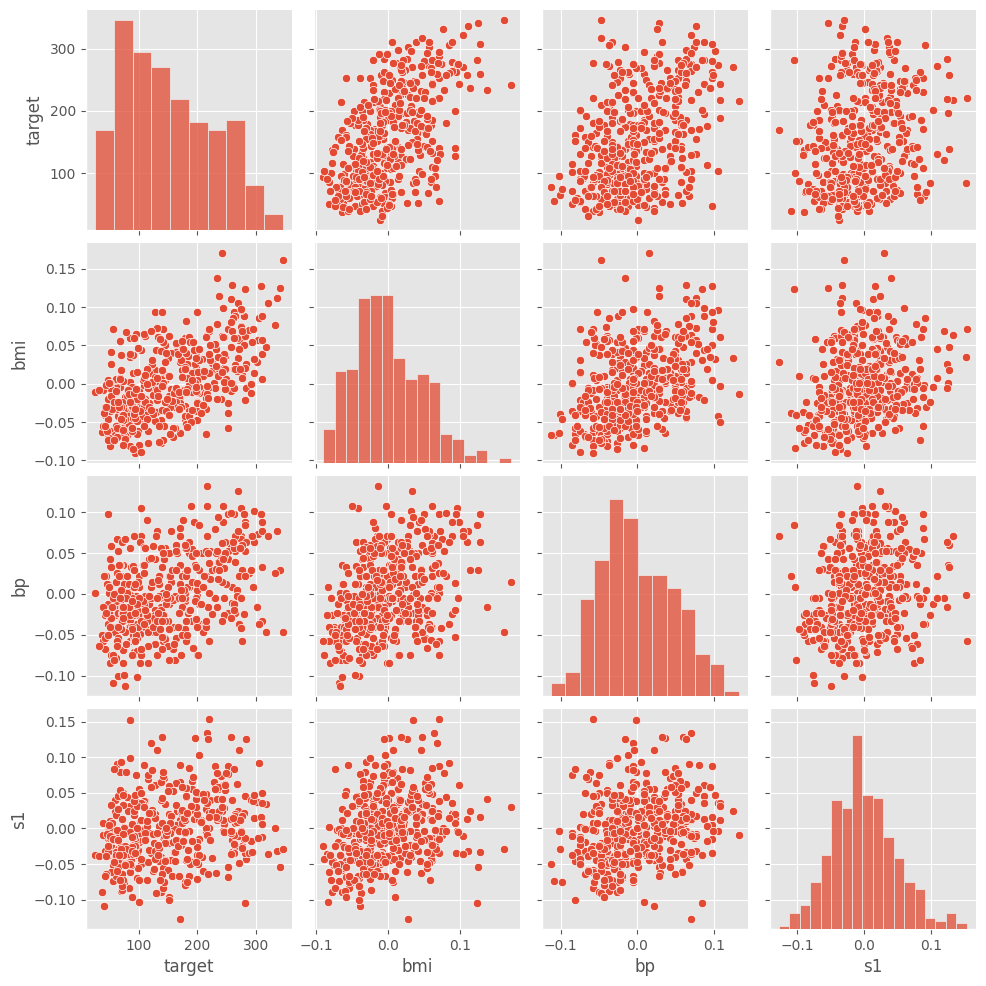

In [38]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

## 나이브 베이즈(Naive Bayes) 기법

## 예제를 이용한 Naive Bayes Python 코드 실습

In [48]:
import pandas as pd
import numpy as np

tennis_data = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/playtennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [50]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [51]:
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
print('X_train :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_train : [[1 4 6 9]
 [1 5 7 9]
 [0 4 6 8]
 [2 4 6 9]
 [1 3 6 8]
 [2 4 6 8]
 [0 4 7 9]
 [2 5 7 8]
 [2 5 7 9]
 [2 4 7 8]]
X_test : [[0 3 6 8]
 [0 5 7 8]
 [0 3 6 9]
 [1 3 7 8]]
y_train : [[11]
 [11]
 [10]
 [10]
 [11]
 [11]
 [11]
 [11]
 [10]
 [11]]
y_test : [[10]
 [11]
 [10]
 [11]]


In [54]:
gnb_clf = GaussianNB()
gnb_clf = gnb_clf.fit(X_train, y_train)

C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
gnb_prediction = gnb_clf.predict(X_test)

In [56]:
print(gnb_prediction)

[11 11 11 11]


In [57]:
'''
Naive Bayes 모델의 predict함수를 사용해 X_test 데이터에 대한 예측값과 실제값 y_test를 비교해 모델의 성능을 평가하겠습니다.

성능 평가에 사용될 평가 요소는 confusion_matrix, classification_report, f1_score, accuracy_score입니다.
성능 평가를 하기 위해 sklearn.metrics 패키지의 confusion_matrix, classification_report, f1_score, accuracy_score 모듈을 import합니다.
'''

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [58]:
'''
Confusion Matrix는 오차행렬을 나타냅니다. Confusion Matrix의 결과를 보면 2x2 행렬인 것을 알 수 있습니다.
Confusion Matrix의 y축은 실제값, x축은 예측값입니다.
'''

print('Confusion Matrix')
print(confusion_matrix(y_test, gnb_prediction))

Confusion Matrix
[[0 2]
 [0 2]]


In [59]:
'''
Classification Report는 분류에 대한 측정 항목을 보여주는 보고서를 나타냅니다.

Classification Report의 측정 항목으로는 클래스 별의 precision, recall, f1-score와
전체 데이터의 precision, recall, f1-score가 있습니다.
'''

print('Classification Report')
print(classification_report(y_test, gnb_prediction))

Classification Report
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         2
          11       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# 실제값과 예측값에 f1-score함수를 사용해 구한 f-measure와 accuracy_score 함수를 사용해 구한 accuracy를 나타내보겠습니다.


'''
f1_score 함수에 파라미터로 실제값 y_test와 예측값 gnb_prediction을 넣고 average를 weighted로 설정합니다.
weighted는 클래스별로 가중치를 적용하는 역할을 합니다. 이렇게 3개의 파라미터를 넣고 f1_score를 구한 후
round 함수를 이용해 소수점 2번째 자리까지 표현한 값을 변수 fmeasure에 저장합니다.
'''
fmeasure = round(f1_score(y_test, gnb_prediction, average = 'weighted'), 2)


'''
accuracy_score 함수에 파라미터로 실제값 y_test와 예측값 gnb_prediction을 넣고 normalize를 True로 설정합니다.
True는 정확도를 계산해서 출력해주는 역할을 합니다. False로 설정하게 되면 올바르게 분류된 데이터의 수를 출력합니다.
이렇게 3개의 파라미터를 넣고 accuracy를 구한 후 round 함수를 이용해 소수점 2번째 자리까지 표현한 값을 변수 accuracy에 저장합니다.
'''
accuracy = round(accuracy_score(y_test, gnb_prediction, normalize = True), 2)

# 컬럼이 Classifier, F-Measure, Accuracy인 데이터프레임을 변수 df_nbclf에 저장합니다.
df_nbclf = pd.DataFrame(columns=['Classifier', 'F-Measure', 'Accuracy'])

In [61]:
'''
컬럼 Classifier에는 Naive Bayes로 저장하고, 데이터프레임 df_nbclf에 loc 함수를 사용해
컬럼에 맞게 fmeasure 데이터와 accuracy 데이터를 데이터프레임에 저장합니다.
'''
df_nbclf.loc[len(df_nbclf)] = ['Naive Bayes', fmeasure, accuracy]


# 저장한 데이터프레임을 출력합니다.
df_nbclf

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.33,0.5


## 로지스틱 함수 (logistic function)

In [62]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [63]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)

In [64]:
b_cancer_df['diagnosis']= b_cancer.target

In [65]:
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [66]:
print('유방암 진단 데이터셋 크기: ', b_cancer_df.shape)

유방암 진단 데이터셋 크기:  (569, 31)


In [67]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

print(b_cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [69]:
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled

#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#로지스틱 회귀 분석: (1) 모델 생성
lr_b_cancer = LogisticRegression()

#로지스틱 회귀 분석: (2) 모델 훈련
lr_b_cancer.fit(X_train, Y_train)

LogisticRegression()

In [71]:
#로지스틱 회귀 분석: (3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#오차 행렬
confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [73]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991, F1: 0.982


In [74]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.972


## 의사결정트리 기법

In [2]:
import pandas as pd

df =  pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/titanic_sns.csv')
df.head()

,survived,pclass,Gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
feature_names = ["pclass", "age", "Gender"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX.tail()

,pclass,age,Gender
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [4]:
from sklearn.preprocessing import LabelEncoder
dfX["Gender"] = LabelEncoder().fit_transform(dfX["Gender"])
dfX.tail()

,pclass,age,Gender
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [5]:
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX.tail()

,pclass,age,Gender
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [6]:
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,Gender,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


# Ensemble Learning

## 배깅(Bagging)


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data=pd.read_csv("https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/kc-house-data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
nCar=data.shape[0]
nVar=data.shape[1]
print(nCar, nVar)

21613 21


In [9]:
data=data.drop(['id','date','zipcode','lat','long'],axis=1)

In [10]:
feature_columns=list(data.columns.difference(['price']))
X=data[feature_columns]
y=data['price']

In [11]:
X

,bathrooms,bedrooms,condition,floors,grade,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated
0,1.00,3,3,1.0,7,1180,0,1180,1340,5650,5650,0,0,1955,0
1,2.25,3,3,2.0,7,2170,400,2570,1690,7242,7639,0,0,1951,1991
2,1.00,2,3,1.0,6,770,0,770,2720,10000,8062,0,0,1933,0
3,3.00,4,5,1.0,7,1050,910,1960,1360,5000,5000,0,0,1965,0
4,2.00,3,3,1.0,8,1680,0,1680,1800,8080,7503,0,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.50,3,3,3.0,8,1530,0,1530,1530,1131,1509,0,0,2009,0
21609,2.50,4,3,2.0,8,2310,0,2310,1830,5813,7200,0,0,2014,0
21610,0.75,2,3,2.0,7,1020,0,1020,1020,1350,2007,0,0,2009,0
21611,2.50,3,3,2.0,8,1600,0,1600,1410,2388,1287,0,0,2004,0


In [12]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [13]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(15129, 15) (6484, 15) (15129,) (6484,)


In [14]:
# 라이브러리 임포트
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
# 선형회귀모델생성
regression_model=LinearRegression()
# 훈련
linear_model1=regression_model.fit(train_x, train_y)
# 예측
predict1=linear_model1.predict(test_x)
# 결과 인쇄
print('RMSE: {}'.format(math.sqrt(mean_squared_error(predict1, test_y))))

RMSE: 223893.6056181597


## Random Forest

In [15]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

#loading the iris dataset
iris = load_iris()

#training data 설정
x_train = iris.data[:-30]
y_train = iris.target[:-30]
#test data 설정
x_test = iris.data[-30:] # test feature data
y_test = iris.target[-30:] # test target data

print(y_train)

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [16]:
#RandomForestClassifier libary를 import
from sklearn.ensemble import RandomForestClassifier
#tree 의 개수 Random Forest 분류 모듈 생성
rfc = RandomForestClassifier(n_estimators=10)
rfc

RandomForestClassifier(n_estimators=10)

In [17]:
rfc.fit(x_train, y_train)
#Test data를 입력해 target data를 예측
prediction = rfc.predict(x_test)
#예측 결과 precision과 실제 test data의 target 을 비교
print (prediction==y_test)

[ True False  True False  True  True False False  True False  True  True
  True False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


In [18]:
#Random forest 정확도 츶정
rfc.score(x_test, y_test)

0.7333333333333333

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print ("Accuracy is : ",accuracy_score(prediction, y_test))
print ("=======================================================")
print (classification_report(prediction, y_test))

Accuracy is :  0.7333333333333333
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.73      1.00      0.85        22

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.model_selection import train_test_split
x = iris.data
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
print (y_test)
print (Y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 0 0 1 2 0 0 1 2 2 2 1 0 0 2 2 1 1 0 0 2 0 0 2 1 2 0 1 2 0]


In [21]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)
prediction_1 = rfc.predict(X_test)
#print (prediction_1 == Y_test)
print ("Accuracy is : ",accuracy_score(prediction_1, Y_test))
print ("=======================================================")
print (classification_report(prediction_1, Y_test))

Accuracy is :  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [22]:
# Initialize the model
clf_2 = RandomForestClassifier(n_estimators=200, # Number of trees
                               max_features=4,    # Num features considered
                                  oob_score=True)    # Use OOB scoring*
clf_2.fit(X_train, Y_train)
prediction_2 = clf_2.predict(X_test)
print (prediction_2 == Y_test)
print ("Accuracy is : ",accuracy_score(prediction_2, Y_test))
print ("=======================================================")
print (classification_report(prediction_2, Y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Accuracy is :  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [23]:
for feature, imp in zip(iris.feature_names, clf_2.feature_importances_):
    print(feature, imp)

sepal length (cm) 0.015807436125195945
sepal width (cm) 0.018762198070190077
petal length (cm) 0.45896689606876306
petal width (cm) 0.506463469735851


### 특성 중요도

In [24]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


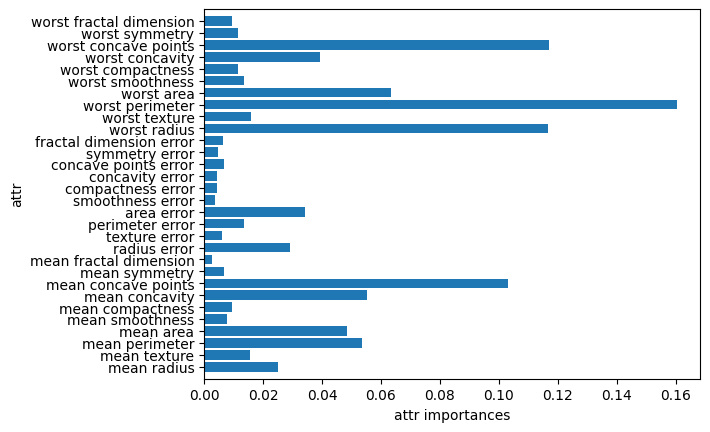

In [26]:
# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plt.show()

plot_feature_importances_cancer(forest)

## Boosting

### AdaBoost 사용해 보기

In [27]:
# 1. 에이다 부스트
# 라이브러리 임포트
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# 데이터 로드-아이리스
iris=datasets.load_iris()
# 특성 초기화
data=iris.data
target=iris.target
# 부스팅 관련 분류기 객체 생성
adaboost=AdaBoostClassifier(random_state=0)
# 훈련
rs_ada=adaboost.fit(data, target)
rs_ada.feature_importances_

array([0.  , 0.  , 0.44, 0.56])

### Gradient Boost(GBM) 사용해 보기


In [28]:
# 라이브러리 임포트
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
# 데이터 로드-아이리스
iris=datasets.load_iris()
# 특성 초기화
data=iris.data
target=iris.target
# 부스팅 관련 분류기 객체 생성
gradientboost=GradientBoostingClassifier(random_state=0)
# 훈련
rs_gb=gradientboost.fit(data, target)
rs_gb.feature_importances_

array([0.0053083 , 0.01347136, 0.30658561, 0.67463473])

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

# 훈련 세트 정확도 : 1.000
# 테스트 세트 정확도 : 0.958
# 훈련 세트의 정확도가 100%이므로 과대적합되었다.
# 과대적합을 막기위해 사전 가지치기를 합니다.

gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [31]:
# 과대적합을 막기위해 학습률을 낮춘다

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.958


In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 훈련 세트의 정확도가 100%이므로 과대적합되었다.
# 과대적합을 막기위해 사전 가지치기를 합니다.
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

# 훈련 세트 정확도 : 0.991
# 테스트 세트 정확도 : 0.972
# 특성 중요도

print("특성 중요도 : \n{}".format(gbrt.feature_importances_))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.00000000e+00 9.07529959e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.32035766e-03 2.65686907e-01
 3.49588341e-04 0.00000000e+00 0.00000000e+00 3.00083378e-04
 0.00000000e+00 1.45838255e-02 1.05083243e-03 0.00000000e+00
 4.75469106e-03 0.00000000e+00 9.56890421e-04 0.00000000e+00
 9.23939383e-03 1.61819935e-02 3.22495788e-01 9.24249926e-02
 6.44041105e-03 0.00000000e+00 6.85101108e-03 2.31450675e-01
 6.41500790e-03 3.42225071e-03]


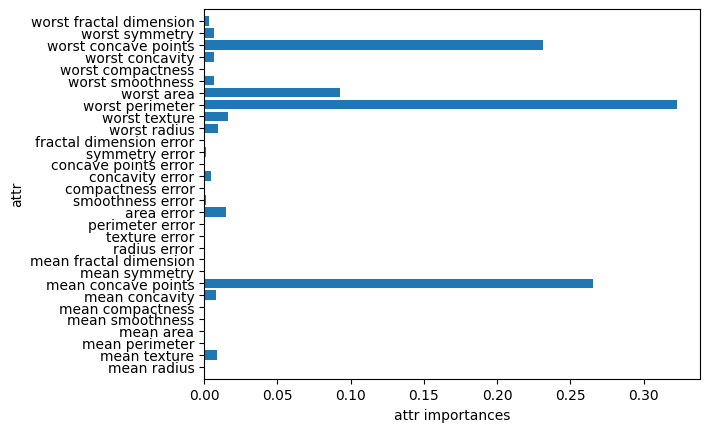

In [33]:
# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plt.show()

plot_feature_importances_cancer(gbrt)


In [34]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

# 지도_수치 예측

## SVM(Support Vector Machine)

### Scikit-Learn의 서포트 벡터 머신

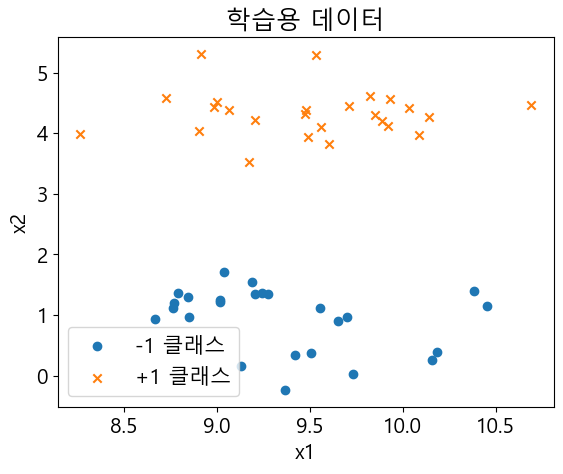

In [35]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]
classifier.fit(training_points, labels)

SVC(kernel='linear')

In [37]:
print(classifier.predict([[3, 2]]))

[1]


In [38]:
print(classifier.support_vectors_)

[[7. 5.]
 [8. 2.]
 [2. 2.]]


In [39]:
print("학습 데이터 점수: {}".format(classifier.score(training_points , labels )))

학습 데이터 점수: 1.0


## 붓꽃 문제에의 응용


In [40]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [41]:
def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mp.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("꽃잎의 길이")
    plt.ylabel("꽃잎의 폭")
    plt.title(title)


model1 = SVC(kernel='linear').fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)

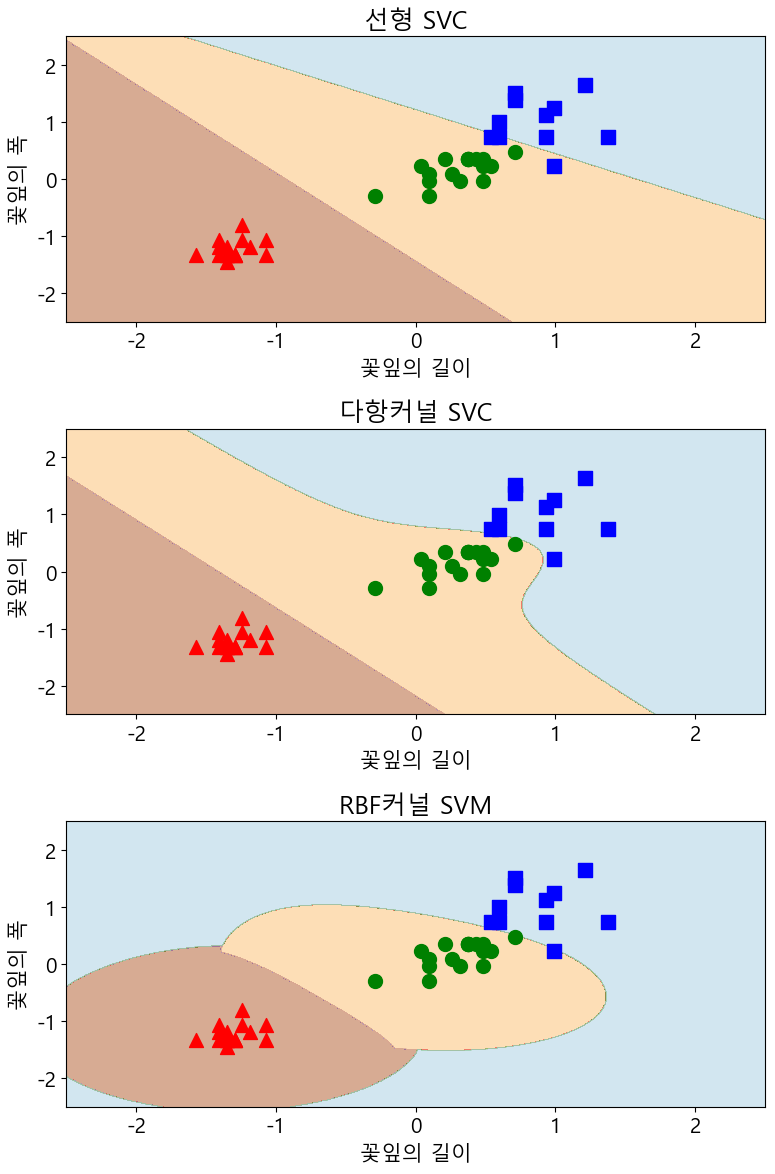

In [42]:
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "선형 SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "다항커널 SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF커널 SVM")
plt.tight_layout()
plt.show()


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

iris = datasets.load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.feature_names)

print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   

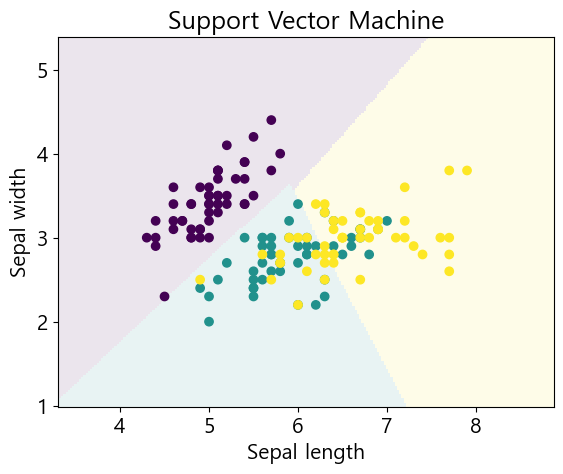

정확도 :  0.82


In [64]:
x = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel='linear', C=1).fit(x, y)

x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
plot_unit = 0.025
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

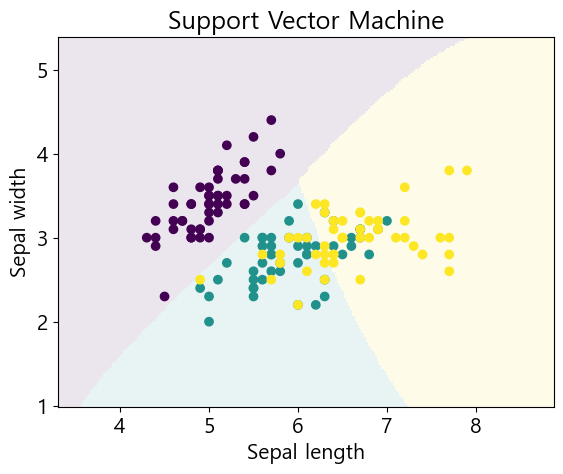

정확도 :  0.82


In [65]:
SVM = svm.SVC(kernel='rbf', C=1).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z,alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

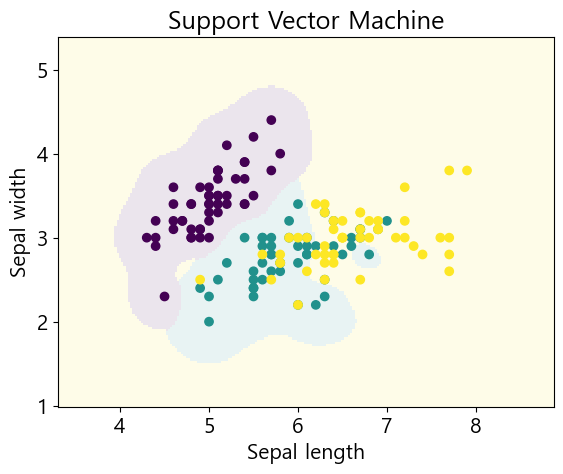

정확도 :  0.84


In [66]:
SVM = svm.SVC(kernel='rbf', C=1, gamma=10).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

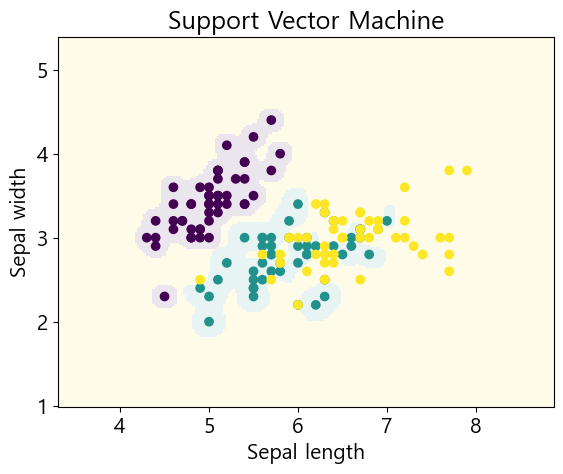

정확도 :  0.92


In [67]:
SVM = svm.SVC(kernel='rbf', C=1, gamma=100).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z,alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

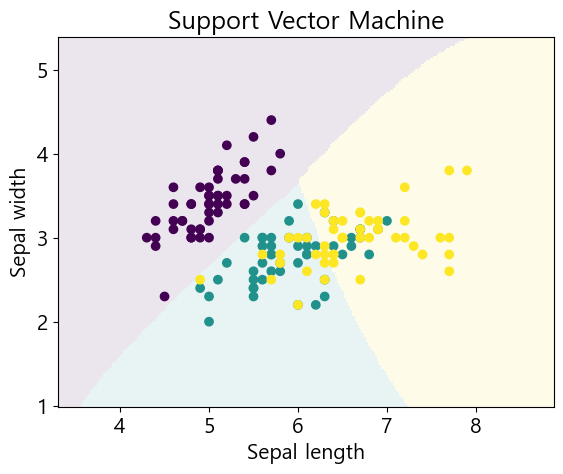

정확도 :  0.82


In [68]:
SVM = svm.SVC(kernel='rbf', C=1).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z,alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

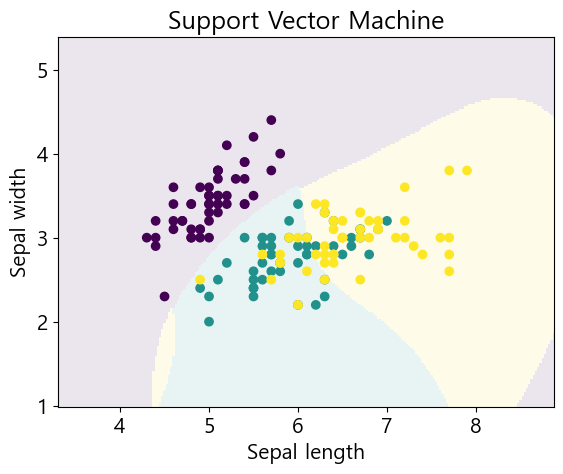

정확도 :  0.8333333333333334


In [69]:
SVM = svm.SVC(kernel='rbf', C=100).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z,alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

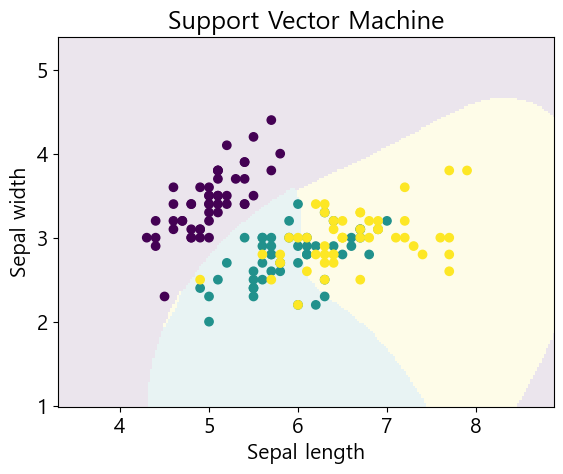

정확도 :  0.82


In [70]:
SVM = svm.SVC(kernel='rbf', C=1000).fit(x, y)
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z,alpha=0.1)
plt.scatter(x[:, 0],x[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X = x, y = y))

# 인공 신경망 분석


## 인공신경망을 이용한 데이터분석


In [43]:
# sklearn의 datasets에서 load_iris를 로드
from sklearn.datasets import load_iris
# iris데이터셋을 iris라는 변수에 저장
iris = load_iris()

In [44]:
# iris에 있는 key값을 나타냄
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
# iris의 데이터에 해당하는 부분의 X와 Y의 크기를 나타냄
iris['data'].shape

(150, 4)

In [46]:
# iris데이터셋의 0번째부터 9번째까지를 슬라이싱해서 나타냄
iris['data'][0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [47]:
# X에는 iris데이터의 값 150x4의 크기를 입력
# y에는 분류하고자 하는 target변수를 입력
# target변수는 데이터가 무엇인지에 대해 판별하는 값
# iris target의 경우 0, 1, 2로 구분됨
X = iris['data']
y = iris['target']

In [48]:
# 위의 데이터를 train과 test로 구분
# sklearn의 model_selection 내에 train_test_split를 로드
# train_test_split를 이용해 위의 X변수에 선언한 data값과 y변수에 선언한 target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
# sklearn 내에 preprocessing의 StandardScaler를 로드
# StandardScaler는 정규화를 시키는 함수
# StandardScaler는 데이터의 범위를 평균 0, 표준편차 1의 범위로 바꿔주는 함수
# 그리고 StandardScaler를 scaler라는 변수에 저장해 사용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
# StandardScaler를 담은 변수에 X_train을 학습해 데이터를 정규화
scaler.fit(X_train)

StandardScaler()

In [51]:
# X_train과 X_test를 StandardScaler를 이용해 정규화
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# 다중인공신경망(MLP) 분류 알고리즘을 sklearn의 neural_network에서 로드
from sklearn.neural_network import MLPClassifier

# MLP 알고리즘의 히든레이어를 3계층(10,10,10)으로 할당
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10))

In [53]:
# 위에서 분류한 X_train과 y_train을 MLP를 이용해 학습
mlp.fit(X_train, y_train)

C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10))

In [54]:
# mlp로 학습한 내용을 X_test에 대해 예측하여 predictions변수에 저장
predictions = mlp.predict(X_test)

In [55]:
# sklearn.metrics의 confusion_matrix와 classification_report를 로드
# confusion_matrix는 데이터가 맞는지의 유무를 판단
# classification_report는 precision과 recall 그리고 f1_score등을 계산해 정확률에 대해 계산
from sklearn.metrics import classification_report, confusion_matrix

# confusion_matrix를 이용해 실제값 y_test와 예측값에 대해 비교
print(confusion_matrix(y_test, predictions))

[[13  0  0]
 [ 0 12  0]
 [ 0  1 12]]


In [56]:
# classification_report를 이용해 정확률, 재현율, f1-score를 확인
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# 클러스터링(군집)

## 군집화 성능기준

In [57]:
import numpy as np

groundtruth = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1],
])
groundtruth

array([[1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1]])

In [58]:
import numpy as np

clustering = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
])
clustering


array([[1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1]])

In [59]:
incidence = 1 * (groundtruth == clustering)  # 1*는 True/False를 숫자 0/1로 바꾸기 위한 계산
incidence

array([[1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1]])

In [60]:
np.fill_diagonal(incidence, 0) # 대각성분 제외
a_plus_b = np.sum(incidence) / 2 # 대칭행렬이므로 절반만 센다.
a_plus_b

6.0

In [61]:
from scipy.special import comb
rand_index = a_plus_b / comb(incidence.shape[0], 2)
rand_index

0.6

## K-Means Clustering

In [74]:
pip install threadpoolctl --upgrade

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


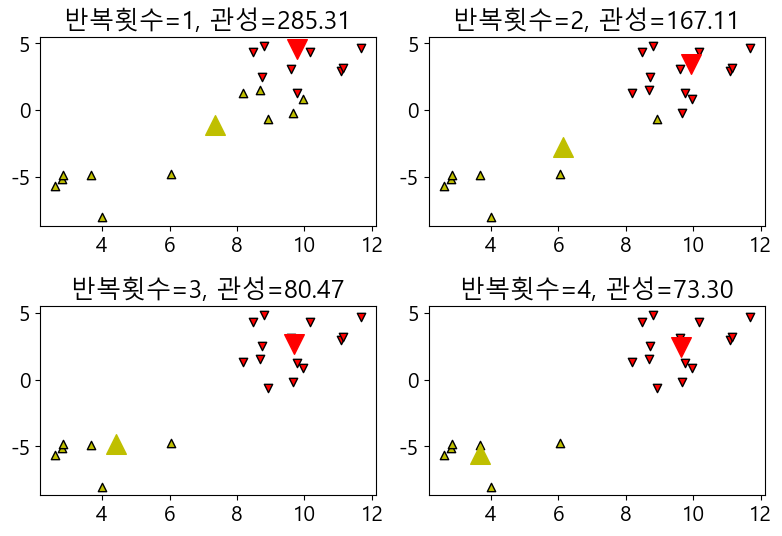

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("반복횟수={}, 관성={:5.2f}".format(n, -model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

## K-평균++ 알고리즘

C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


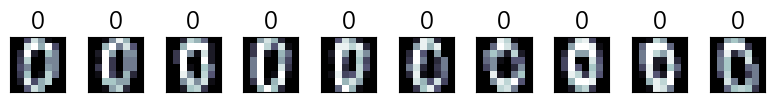

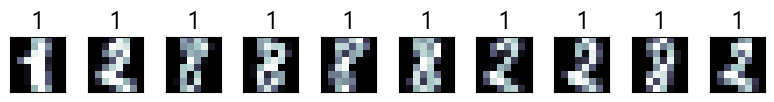

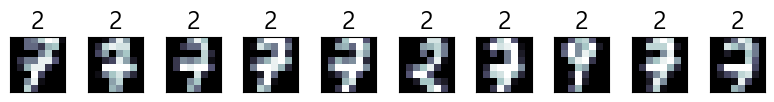

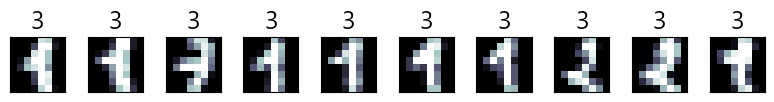

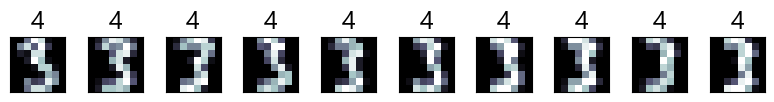

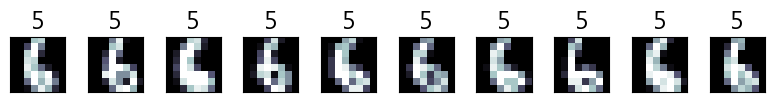

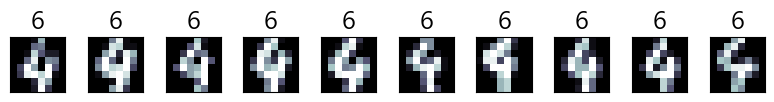

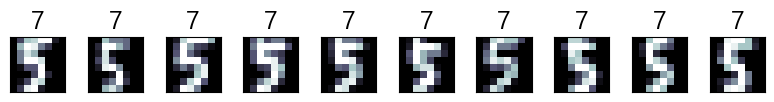

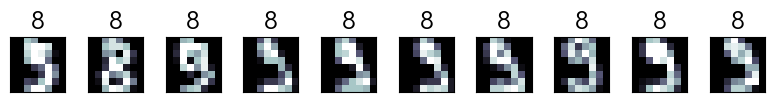

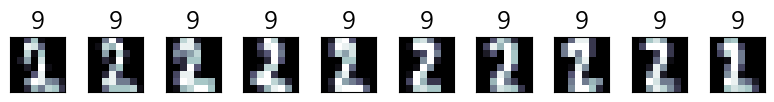

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[176,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 100,   0,  54,   1,   2,   0,   1,   0,  24],
       [  1,   8,   3,   2,  13,   0,   0,   0,   2, 148],
       [  0,   7,   7,   0, 154,   0,   0,   2,  13,   0],
       [  0,   2,  11,   3,   0,   0, 165,   0,   0,   0],
       [  0,   0,   0,   0,   2,   1,   2, 136,  41,   0],
       [  1,   3,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   2, 174,   2,   0,   0,   0,   1,   0,   0],
       [  0, 100,   5,   6,   2,   2,   0,   4,  52,   3],
       [  0,   1,   8,  20,   6,   0,   0,   6, 139,   0]], dtype=int64)

In [14]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.6657284343995036
AMI: 0.7398704133523997
Silhouette Score: 0.18253573914791615


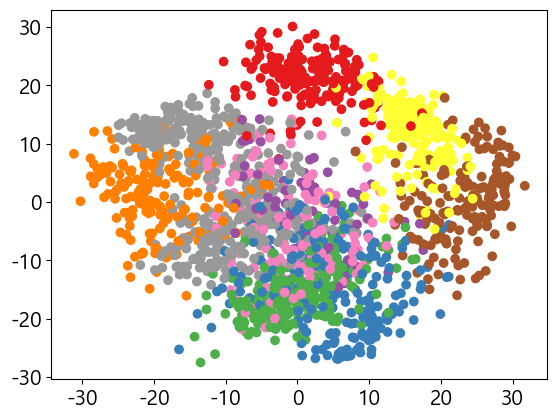

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

In [16]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

%%time
model1 = KMeans(n_clusters=3).fit(X)

%%time
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)

UsageError: Line magic function `%%time` not found.


In [17]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [18]:
%%time
model1 = KMeans(n_clusters=3).fit(X)

C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: total: 656 ms
Wall time: 449 ms


In [19]:
%%time
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)

CPU times: total: 62.5 ms
Wall time: 77.4 ms


C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


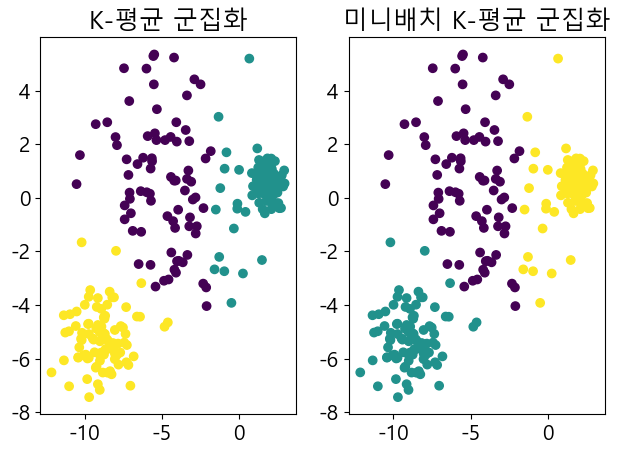

In [20]:
import numpy as np

idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("K-평균 군집화")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("미니배치 K-평균 군집화")
plt.tight_layout()
plt.show()

## K-means 실습

In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# generate sample data
# set seed (random number generator)
np.random.seed(0)
# set centers
centers = [[1, 1], [0, 0], [2, -1]]

# n_samples : the total 
# centers : the number of centers to generate
# cluster_std : fixed center locations
data, labels_true = make_blobs(n_samples = 2000, centers = centers, 
                               cluster_std = 0.7)
							   
data.shape

print(data)
print()
print(labels_true)
print(np.unique(labels_true))

[[ 2.88735684  0.94825273]
 [ 0.00712986  1.53880744]
 [ 0.3264657  -0.06607475]
 ...
 [ 0.53901292  0.64003622]
 [ 1.65065358  1.40755721]
 [ 0.74131908 -0.71579507]]

[0 1 1 ... 0 0 1]
[0 1 2]


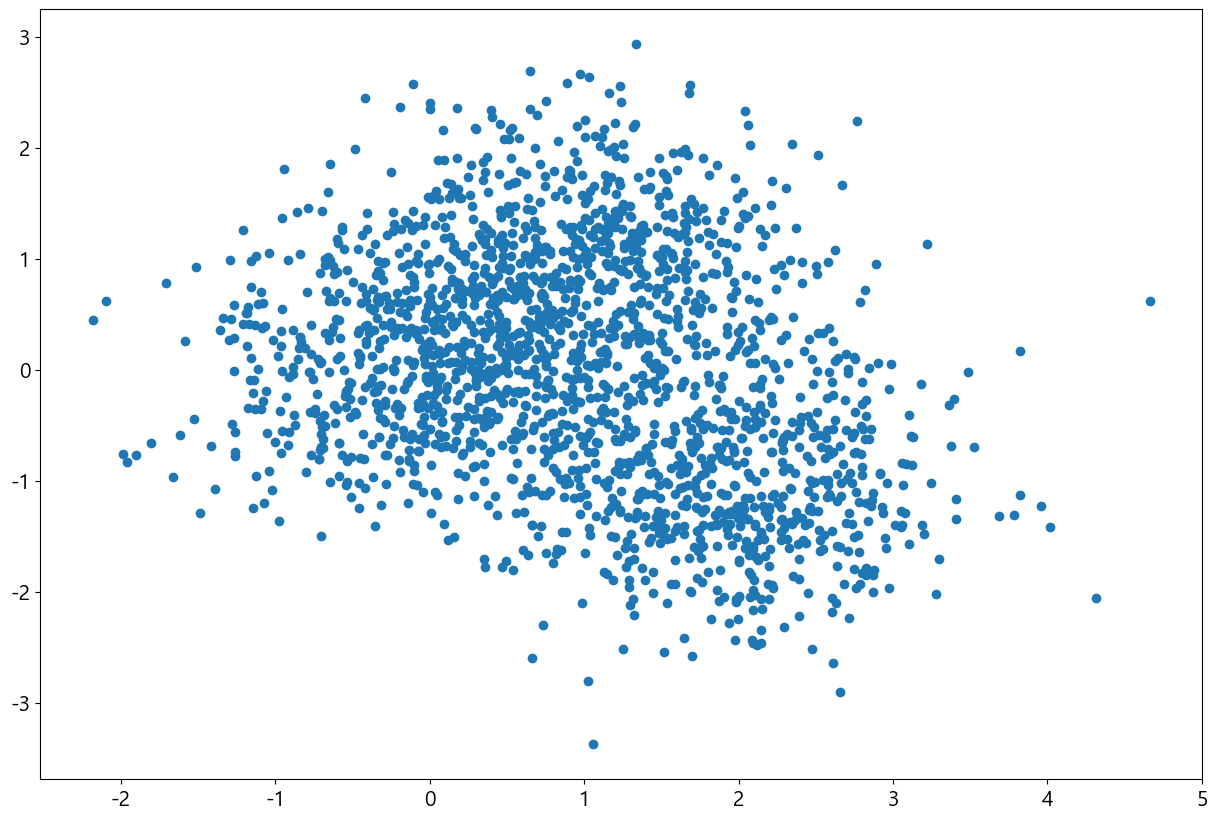

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(data[:,0], data[:,1])

In [23]:
# compute clustering with KMeans
estimator = KMeans(init = 'k-means++', n_clusters = 3, n_init = 10)
estimator.fit(data)

KMeans(n_clusters=3, n_init=10)

In [24]:
labels_predict = estimator.labels_
np.unique(labels_predict)

array([0, 1, 2])

In [25]:
# normalize into [0,1]
cm = plt.cm.get_cmap('jet')
scaled_labels = (labels_predict - np.min(labels_predict)) 
scaled_labels = scaled_labels /(np.max(labels_predict) - np.min(labels_predict))
np.unique(scaled_labels)

C:\Users\k8s\AppData\Local\Temp\ipykernel_5756\3822171757.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')


array([0. , 0.5, 1. ])

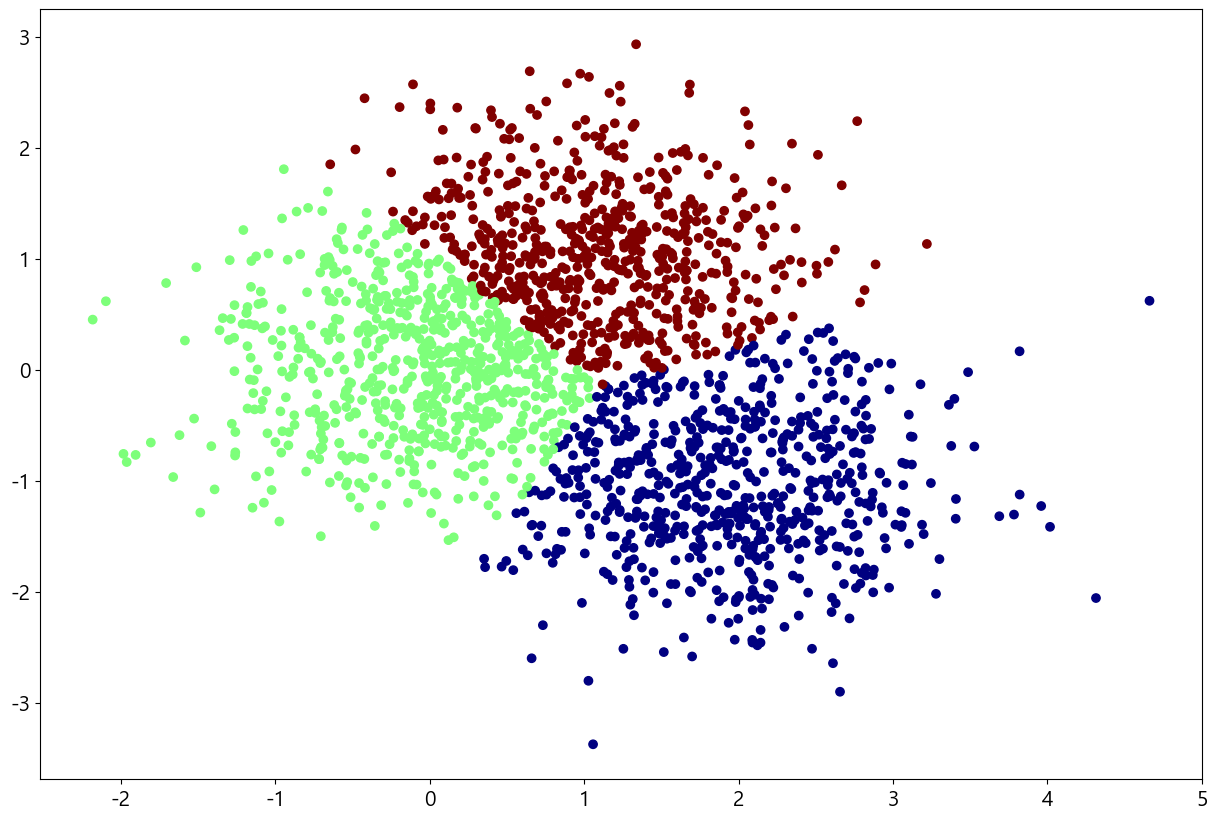

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(data[:,0], data[:,1], c = cm(scaled_labels))

# PCA

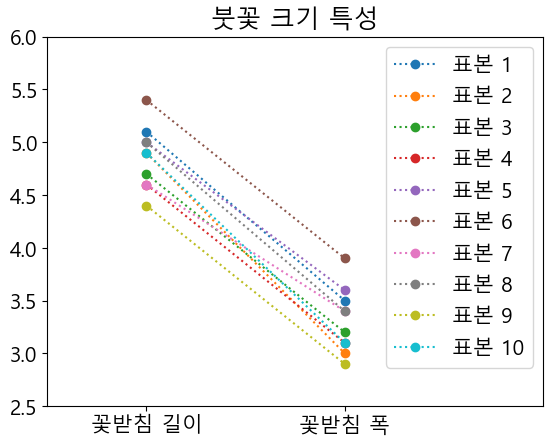

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(2), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()

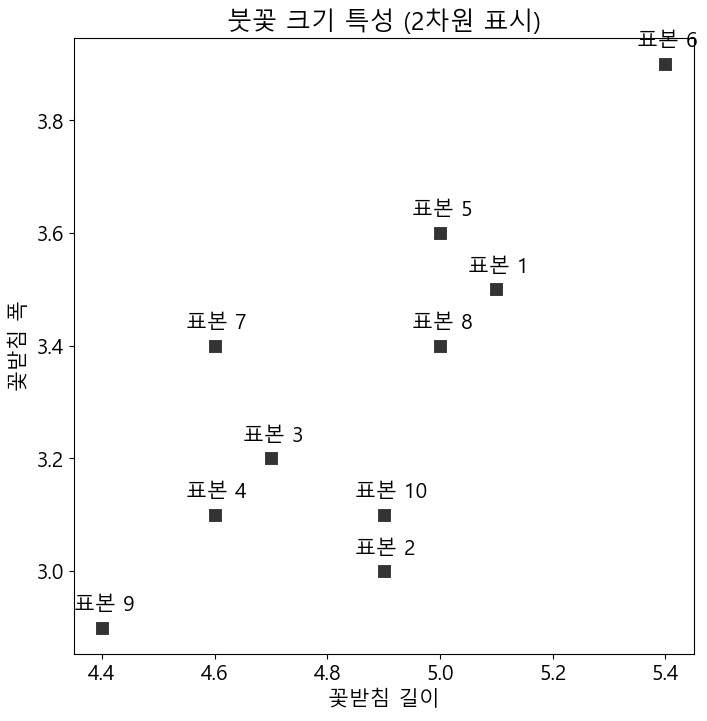

In [31]:
import pandas as pd
import seaborn as sns

# 데이터프레임 생성
df = pd.DataFrame(X, columns=["꽃받침 길이", "꽃받침 폭"])

plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="꽃받침 길이", y="꽃받침 폭", data=df, s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원 표시)")
plt.axis("equal")
plt.show()

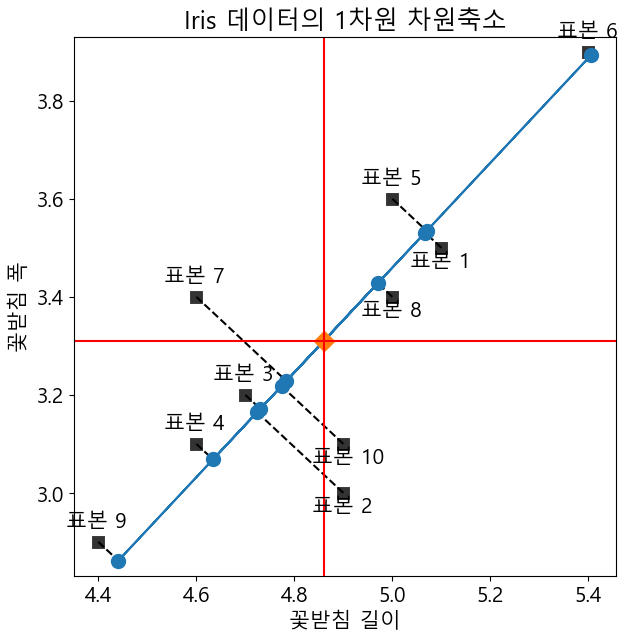

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

# 데이터프레임 생성
df = pd.DataFrame(X, columns=["꽃받침 길이", "꽃받침 폭"])

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(x="꽃받침 길이", y="꽃받침 폭", data=df, s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

# SVD

In [34]:
from numpy.linalg import svd

A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)

U

array([[-4.08248290e-01,  8.94427191e-01, -1.82574186e-01],
       [-8.16496581e-01, -4.47213595e-01, -3.65148372e-01],
       [-4.08248290e-01, -2.06937879e-16,  9.12870929e-01]])

In [35]:
S

array([3.46410162, 3.16227766])

In [36]:
np.diag(S, 1)[:, 1:]

array([[3.46410162, 0.        ],
       [0.        , 3.16227766],
       [0.        , 0.        ]])

In [37]:
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [38]:
U @ np.diag(S, 1)[:, 1:] @ VT

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

In [39]:
U2, S2, VT2 = svd(A, full_matrices=False)

U2

array([[-4.08248290e-01,  8.94427191e-01],
       [-8.16496581e-01, -4.47213595e-01],
       [-4.08248290e-01, -2.06937879e-16]])

In [40]:
S2

array([3.46410162, 3.16227766])

In [41]:
VT2

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [42]:
U2 @ np.diag(S2) @ VT2

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

# Association Rule Analysis

In [5]:
pip install mlxtend

  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


## Apriori  예

In [6]:
# 패키지 임포트
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd

# 데이터 셋 생성
dataset=[['사과','치즈','생수'],
['생수','호두','치즈','고등어'],
['수박','사과','생수'],
['생수','호두','치즈','옥수수']]

dataset

[['사과', '치즈', '생수'],
 ['생수', '호두', '치즈', '고등어'],
 ['수박', '사과', '생수'],
 ['생수', '호두', '치즈', '옥수수']]

In [7]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
df=pd.DataFrame(te_ary, columns=te.columns_)

df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [8]:
frequent_itemsets=apriori(df, min_support=0.5, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(생수, 사과)"
5,0.75,"(생수, 치즈)"
6,0.50,"(생수, 호두)"
7,0.50,"(호두, 치즈)"
8,0.50,"(생수, 호두, 치즈)"


In [9]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
1,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0,0.0
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf,0.0
4,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
5,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
6,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
7,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
8,"(생수, 호두)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
9,"(생수, 치즈)",(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0


## FP-Growth

In [10]:
pip install mlxtend --upgrade

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

data = [
    ['휴지', '물티슈', '샴푸'],
    ['수세미', '물티슈', '비누'],
    ['휴지', '수세미', '물티슈', '비누'],
    ['수세미', '비누']
]

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(data)
df_encoded = pd.DataFrame(encoded_data, columns=mlb.classes_)

print(df_encoded)

   물티슈  비누  샴푸  수세미  휴지
0    1   0   1    0   1
1    1   1   0    1   0
2    1   1   0    1   1
3    0   1   0    1   0


In [12]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df_encoded, min_support=0.5, use_colnames=True)

C:\DEV\miniconda3\envs\py38_basic\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.75,(물티슈)
1,0.50,(휴지)
2,0.75,(수세미)
3,0.75,(비누)
4,0.50,"(물티슈, 비누)"
5,0.50,"(수세미, 물티슈)"
6,0.50,"(수세미, 물티슈, 비누)"
7,0.50,"(물티슈, 휴지)"
8,0.75,"(수세미, 비누)"


# 성능평가

In [43]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [44]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

confusion_matrix(y_true, y_pred, labels=[1, 0])

array([[3, 1],
       [0, 2]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [46]:
y_true = [0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 2, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       0.50      0.50      0.50         2
     class 2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.72      0.72      0.72         7
weighted avg       0.71      0.71      0.71         7



In [47]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.363163,1.0,1.0
1,2.065047,1.0,1.0
2,1.633657,1.0,1.0
3,1.626171,1.0,1.0
4,1.624967,1.0,1.0
5,1.219678,1.0,1.0
6,0.378296,1.0,0.0
7,0.094285,1.0,1.0
8,-0.438666,0.0,0.0
9,-0.765888,0.0,0.0


In [48]:
confusion_matrix(y, y_hat, labels=[1, 0])

recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.75
fallout = 0.125


In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([        inf,  2.36316277,  1.21967832,  0.37829565,  0.09428499,
        -0.76588836, -0.92693183, -4.11896895]))

In [50]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([       inf, 0.9139748 , 0.77200693, 0.59346197, 0.5235538 ,
        0.31736921, 0.28354759, 0.01600107]))

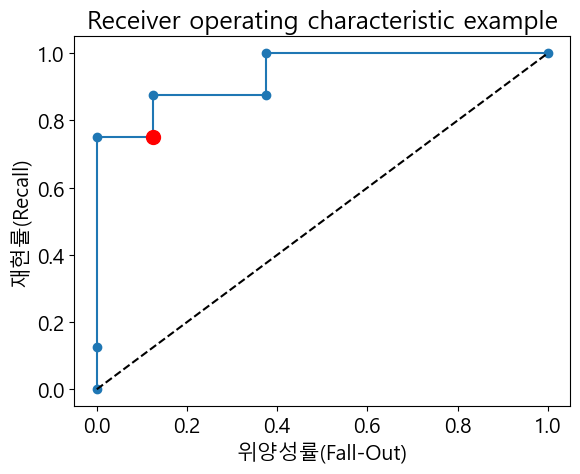

In [51]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [52]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [53]:
print(confusion_matrix(y, y_hat1))
print(confusion_matrix(y, y_hat2))
print(classification_report(y, model1.predict(X)))
print(classification_report(y, model2.predict(X)))

[[940   3]
 [ 30  27]]
[[940   3]
 [ 30  27]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



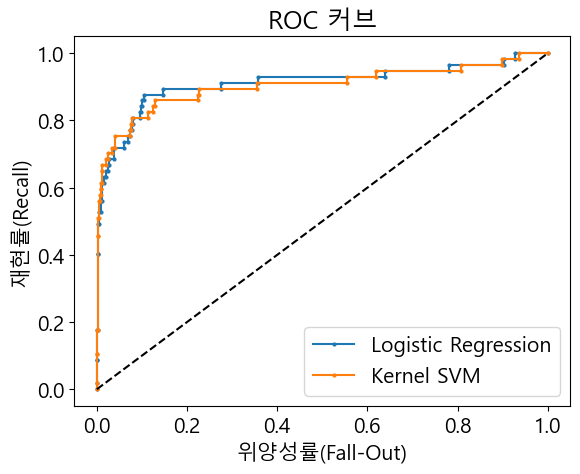

In [54]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC 커브')
plt.show()

In [55]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

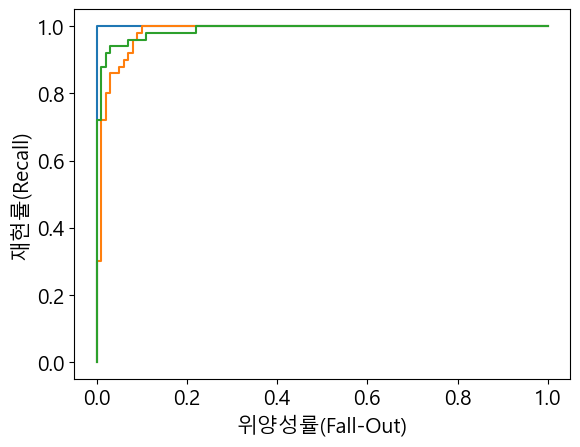

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2]) 

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

# Practice Questions-Workbooks4

In [57]:
from sklearn import datasets

d=datasets.load_iris() # iris 데이터셋을 읽고
print(d.DESCR) # 내용을 출력

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [58]:
for i in range(0,len(d.data)): # 샘플을 순서대로 출력
    print(i+1,d.data[i],d.target[i])

1 [5.1 3.5 1.4 0.2] 0
2 [4.9 3.  1.4 0.2] 0
3 [4.7 3.2 1.3 0.2] 0
4 [4.6 3.1 1.5 0.2] 0
5 [5.  3.6 1.4 0.2] 0
6 [5.4 3.9 1.7 0.4] 0
7 [4.6 3.4 1.4 0.3] 0
8 [5.  3.4 1.5 0.2] 0
9 [4.4 2.9 1.4 0.2] 0
10 [4.9 3.1 1.5 0.1] 0
11 [5.4 3.7 1.5 0.2] 0
12 [4.8 3.4 1.6 0.2] 0
13 [4.8 3.  1.4 0.1] 0
14 [4.3 3.  1.1 0.1] 0
15 [5.8 4.  1.2 0.2] 0
16 [5.7 4.4 1.5 0.4] 0
17 [5.4 3.9 1.3 0.4] 0
18 [5.1 3.5 1.4 0.3] 0
19 [5.7 3.8 1.7 0.3] 0
20 [5.1 3.8 1.5 0.3] 0
21 [5.4 3.4 1.7 0.2] 0
22 [5.1 3.7 1.5 0.4] 0
23 [4.6 3.6 1.  0.2] 0
24 [5.1 3.3 1.7 0.5] 0
25 [4.8 3.4 1.9 0.2] 0
26 [5.  3.  1.6 0.2] 0
27 [5.  3.4 1.6 0.4] 0
28 [5.2 3.5 1.5 0.2] 0
29 [5.2 3.4 1.4 0.2] 0
30 [4.7 3.2 1.6 0.2] 0
31 [4.8 3.1 1.6 0.2] 0
32 [5.4 3.4 1.5 0.4] 0
33 [5.2 4.1 1.5 0.1] 0
34 [5.5 4.2 1.4 0.2] 0
35 [4.9 3.1 1.5 0.2] 0
36 [5.  3.2 1.2 0.2] 0
37 [5.5 3.5 1.3 0.2] 0
38 [4.9 3.6 1.4 0.1] 0
39 [4.4 3.  1.3 0.2] 0
40 [5.1 3.4 1.5 0.2] 0
41 [5.  3.5 1.3 0.3] 0
42 [4.5 2.3 1.3 0.3] 0
43 [4.4 3.2 1.3 0.2] 0
44 [5.  3.5 1.6 0.6]

In [59]:
from sklearn import svm

s=svm.SVC(gamma=0.1,C=10) # svm 분류 모델 SVC 객체 생성하고
s.fit(d.data,d.target) # iris 데이터로 학습

new_d=[[6.4,3.2,6.0,2.5],[7.1,3.1,4.7,1.35]] # 101번째와 51번째 샘플을 변형하여 새로운 데이터 생성
res=s.predict(new_d)
print("새로운 2개 샘플의 부류는", res)

새로운 2개 샘플의 부류는 [2 1]


In [60]:
# 6. 모델 저장하기
import pickle
import joblib

joblib.dump(s, './svm_model.pkl')

['./svm_model.pkl']

In [ ]:
# 7.저장한 파일을 불러와서 predict
svm_model = joblib.load('svm_model.pkl') 
EvaluationData=[[6.4,3.2,6.0,2.5],[7.1,3.1,4.7,1.35]]
print("예측: {}".format(svm_model.predict(EvaluationData)))

In [61]:
# 7.저장한 파일을 불러와서 predict
svm_model = joblib.load('svm_model.pkl') 
EvaluationData=[[6.4,3.2,6.0,2.5],[7.1,3.1,4.7,1.35]]
print("예측: {}".format(svm_model.predict(EvaluationData)))

예측: [2 1]
